### Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

%config InlineBackend.figure_format = 'retina'

### Install required libraries

In [2]:
# !pip install lightgbm
# !pip install xgboost

### Load the datase

In [3]:
file_path = "diabetes_predicted_SkinThickness.csv"  # Update this if needed
df = pd.read_csv(file_path)

### Separate features & target variable

In [4]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

### Split the dataset (80/20)

In [5]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression

### Make Prediction

In [14]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### View Result

In [16]:
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.8000

Confusion Matrix:
[[89 13]
 [16 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145



# 2. Naive Bayes

### Make Prediction

In [19]:
# Train the Gaussian Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### View Result

In [21]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.7655

Confusion Matrix:
[[83 19]
 [15 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       102
           1       0.60      0.65      0.62        43

    accuracy                           0.77       145
   macro avg       0.72      0.73      0.73       145
weighted avg       0.77      0.77      0.77       145



# 3. Support Vector Machines

### Make Prediction

In [24]:
# Train the SVM model with RBF kernel
model = SVC(kernel="rbf", C=1.0, gamma="scale")  # You can change the kernel to 'linear', 'poly', or 'sigmoid'
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


### View results

In [26]:
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.7655

Confusion Matrix:
[[88 14]
 [20 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       102
           1       0.62      0.53      0.57        43

    accuracy                           0.77       145
   macro avg       0.72      0.70      0.71       145
weighted avg       0.76      0.77      0.76       145



# 4. K-Nearest Neighbor

### Make Prediction

In [29]:
# Train the KNN model (using k=5)
k = 5  # You can experiment with different k values
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### View Result

In [31]:
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.7379

Confusion Matrix:
[[80 22]
 [16 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       102
           1       0.55      0.63      0.59        43

    accuracy                           0.74       145
   macro avg       0.69      0.71      0.70       145
weighted avg       0.75      0.74      0.74       145



# 5. Decision Tree

### Make Prediction

In [34]:
# Train the Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)  # You can try "entropy" instead of "gini"
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### View Result

In [36]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.8207

Confusion Matrix:
[[90 12]
 [14 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       102
           1       0.71      0.67      0.69        43

    accuracy                           0.82       145
   macro avg       0.79      0.78      0.78       145
weighted avg       0.82      0.82      0.82       145



# 5. Random Forest

### Make Prediction

In [39]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### View Result

In [41]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.8000

Confusion Matrix:
[[88 14]
 [15 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       102
           1       0.67      0.65      0.66        43

    accuracy                           0.80       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.80      0.80      0.80       145



# 6. Bootstrap Aggregating (Bagging) Trees

### Make Prediction

In [44]:
# Train the Bagging Classifier using Decision Trees as the base estimator
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
    n_estimators=100,
    bootstrap=True,  # Enables bagging
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

### View Result

In [46]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.7931

Confusion Matrix:
[[86 16]
 [14 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       102
           1       0.64      0.67      0.66        43

    accuracy                           0.79       145
   macro avg       0.75      0.76      0.76       145
weighted avg       0.80      0.79      0.79       145



# 7. Light GBM

### Make Prediction

In [49]:
# Train the LightGBM model
model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


[LightGBM] [Info] Number of positive: 206, number of negative: 373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 579, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355786 -> initscore=-0.593702
[LightGBM] [Info] Start training from score -0.593702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### View Result

In [51]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.8069

Confusion Matrix:
[[86 16]
 [12 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       102
           1       0.66      0.72      0.69        43

    accuracy                           0.81       145
   macro avg       0.77      0.78      0.77       145
weighted avg       0.81      0.81      0.81       145



# 8. XGBoost

### Make Prediction

In [54]:
# Train the XGBoost model
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    learning_rate=0.05,
    n_estimators=100,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


### View Result

In [56]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.8069

Confusion Matrix:
[[87 15]
 [13 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       102
           1       0.67      0.70      0.68        43

    accuracy                           0.81       145
   macro avg       0.77      0.78      0.77       145
weighted avg       0.81      0.81      0.81       145



# 9. Multilayer Perceptron

### Make Prediction

In [59]:
# Train the MLP model (Neural Network)
model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # Three hidden layers with 128, 64, and 32 neurons
    activation="relu",  # ReLU activation function
    solver="adam",  # Adam optimizer
    learning_rate_init=0.001,  # Initial learning rate
    max_iter=500,  # Maximum training iterations
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


### View Result

In [61]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.7172

Confusion Matrix:
[[81 21]
 [20 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       102
           1       0.52      0.53      0.53        43

    accuracy                           0.72       145
   macro avg       0.66      0.66      0.66       145
weighted avg       0.72      0.72      0.72       145



# Overall Comparison

In [6]:
# Dictionary of models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel="rbf"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Bagging (Decision Tree)": BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=10, random_state=42), 
        n_estimators=100, random_state=42
    ),
    "XGBoost": XGBClassifier(objective="binary:logistic", eval_metric="logloss", learning_rate=0.05, n_estimators=100, max_depth=6, random_state=42),
    "LightGBM": LGBMClassifier(boosting_type="gbdt", num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", solver="adam", learning_rate_init=0.001, max_iter=500, random_state=42)
}

In [7]:
# Store performance metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Logistic Regression - Accuracy: 0.8000, Precision: 0.6750, Recall: 0.6279, F1 Score: 0.6506
Naïve Bayes - Accuracy: 0.7655, Precision: 0.5957, Recall: 0.6512, F1 Score: 0.6222
Support Vector Machine - Accuracy: 0.7655, Precision: 0.6216, Recall: 0.5349, F1 Score: 0.5750
K-Nearest Neighbors - Accuracy: 0.7379, Precision: 0.5510, Recall: 0.6279, F1 Score: 0.5870
Decision Tree - Accuracy: 0.7310, Precision: 0.5455, Recall: 0.5581, F1 Score: 0.5517
Random Forest - Accuracy: 0.8000, Precision: 0.6667, Recall: 0.6512, F1 Score: 0.6588
Bagging (Decision Tree) - Accuracy: 0.7931, Precision: 0.6444, Recall: 0.6744, F1 Score: 0.6591
XGBoost - Accuracy: 0.8069, Precision: 0.6667, Recall: 0.6977, F1 Score: 0.6818
[LightGBM] [Info] Number of positive: 206, number of negative: 373
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of

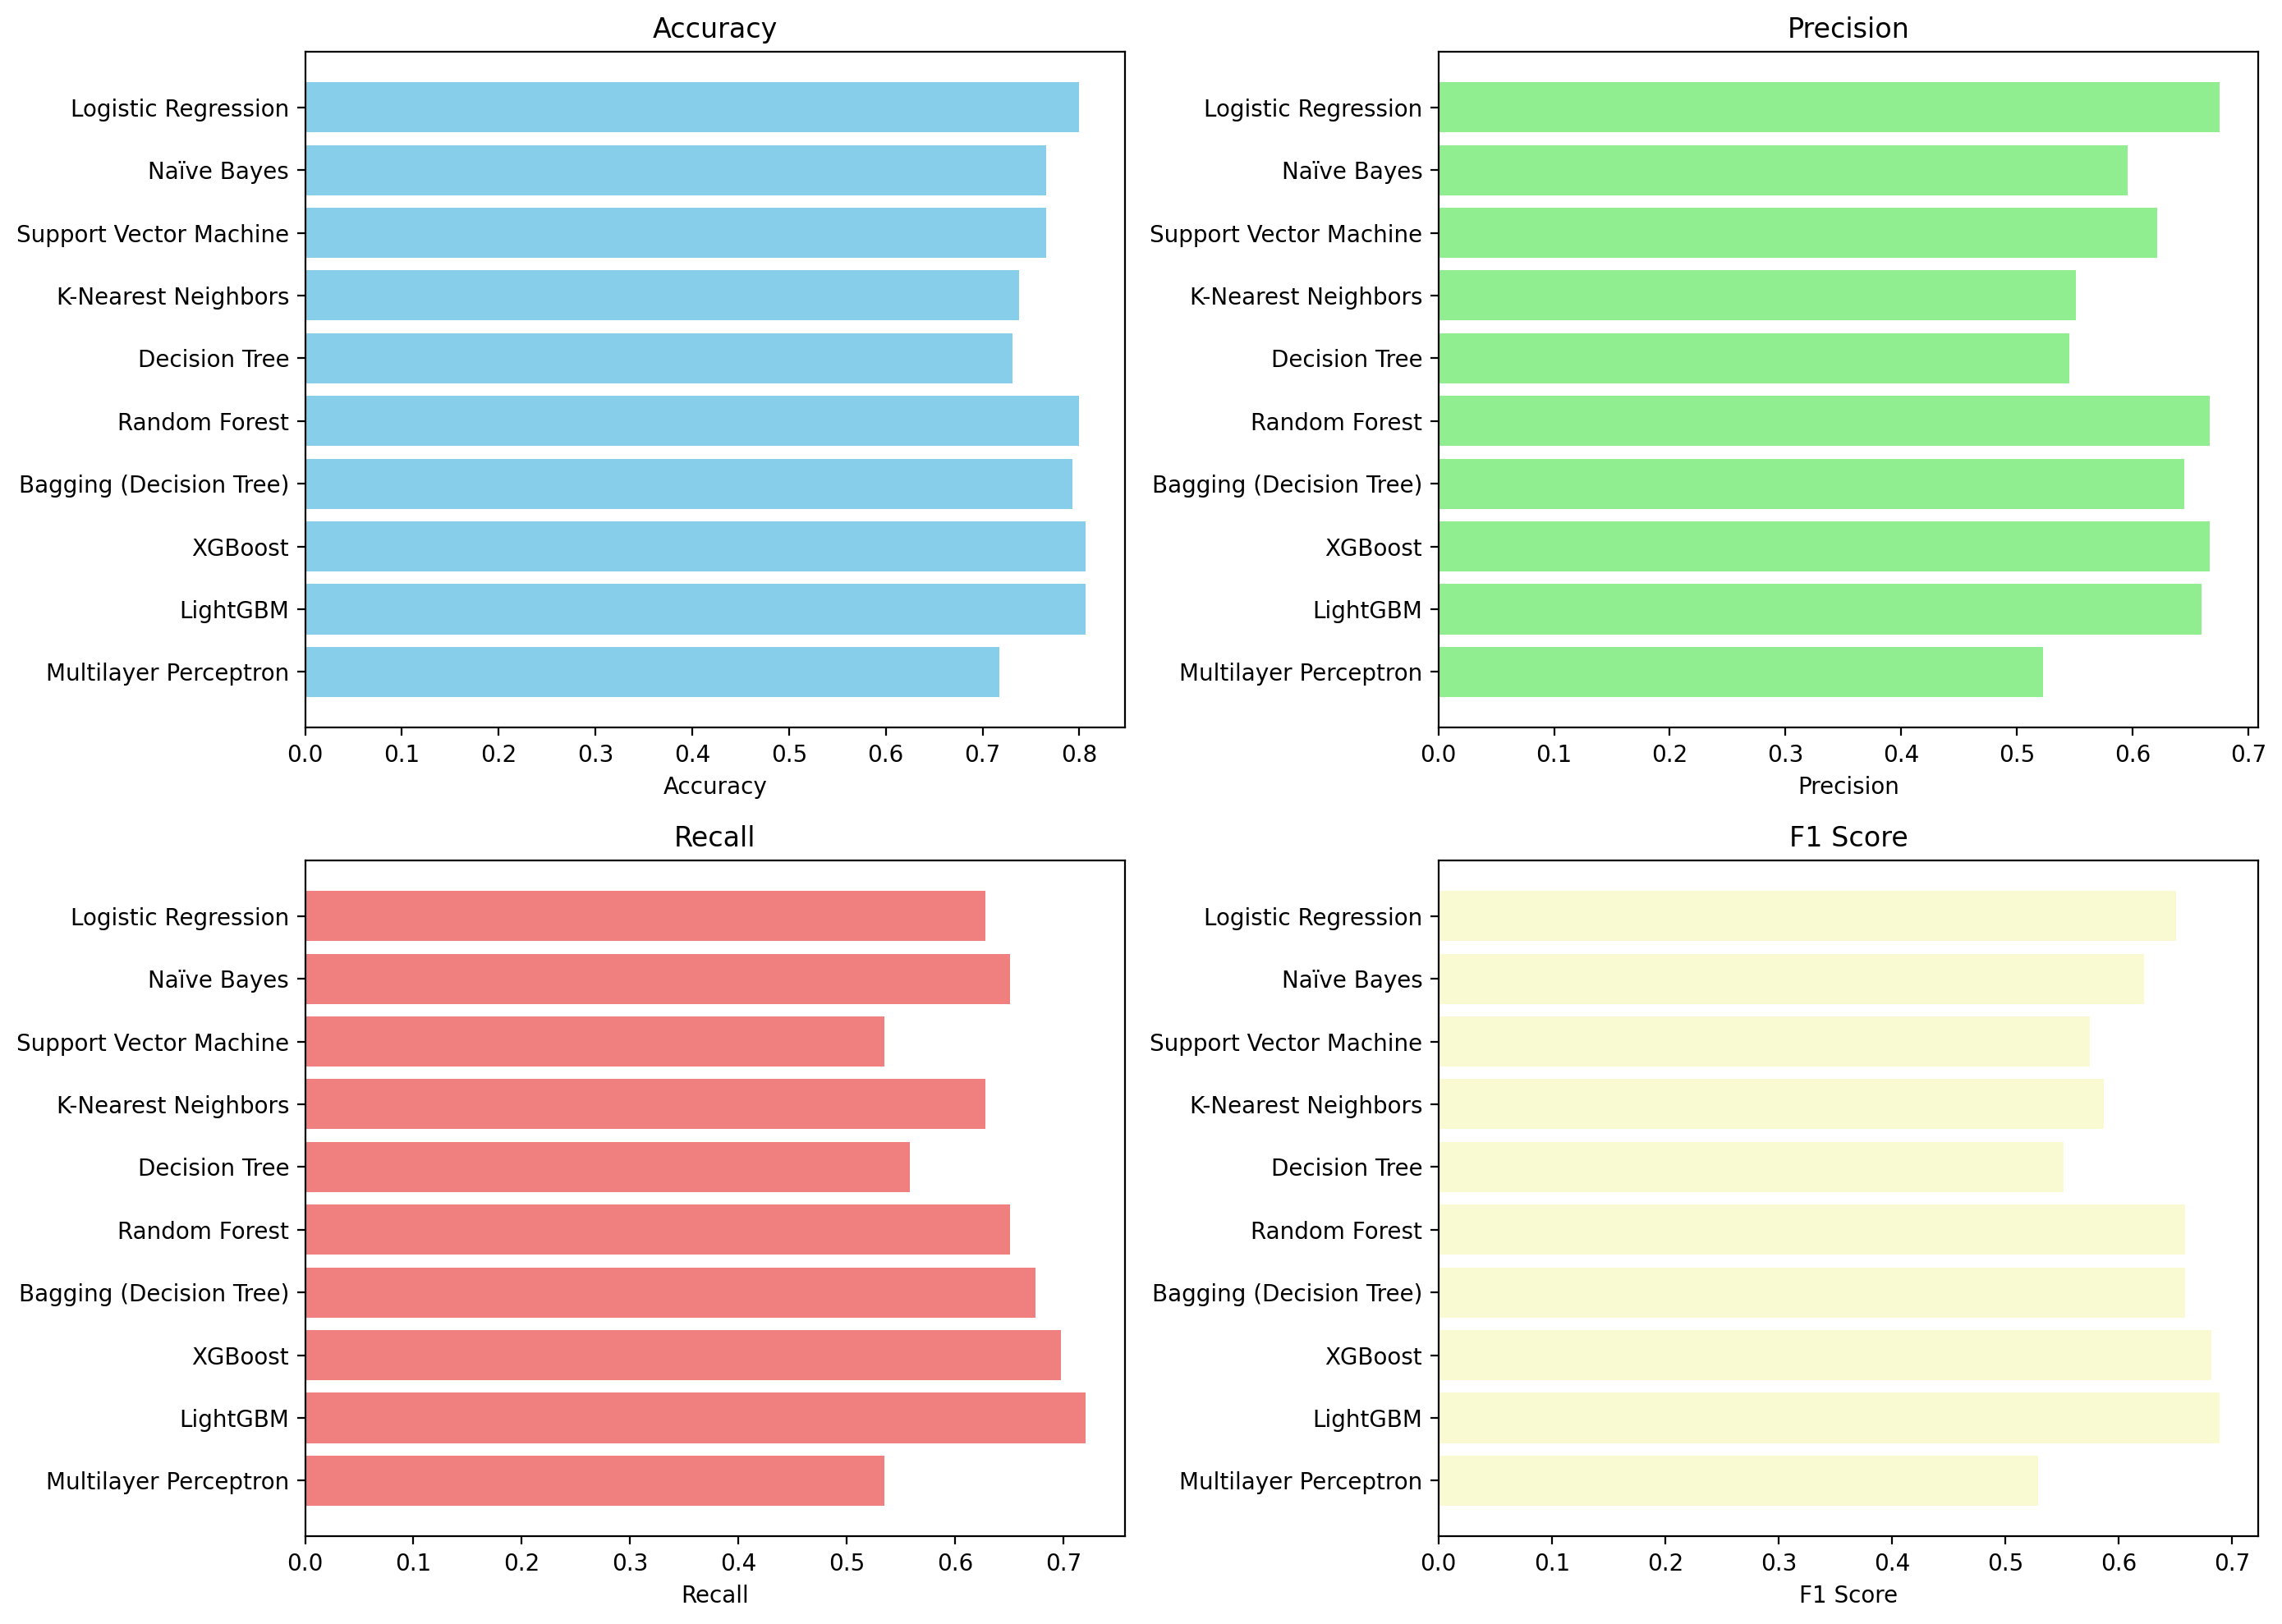

In [8]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy
axes[0, 0].barh(results_df["Model"], results_df["Accuracy"], color="skyblue")
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_xlabel("Accuracy")
axes[0, 0].invert_yaxis()

# Plot Precision
axes[0, 1].barh(results_df["Model"], results_df["Precision"], color="lightgreen")
axes[0, 1].set_title("Precision")
axes[0, 1].set_xlabel("Precision")
axes[0, 1].invert_yaxis()

# Plot Recall
axes[1, 0].barh(results_df["Model"], results_df["Recall"], color="lightcoral")
axes[1, 0].set_title("Recall")
axes[1, 0].set_xlabel("Recall")
axes[1, 0].invert_yaxis()

# Plot F1 Score
axes[1, 1].barh(results_df["Model"], results_df["F1 Score"], color="lightgoldenrodyellow")
axes[1, 1].set_title("F1 Score")
axes[1, 1].set_xlabel("F1 Score")
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig("model_metrics_plot_2.png", format="png")
plt.show()